In [1]:
import pandas as pd
import scipy.sparse
import scipy
import scipy.io
import numpy as np
from sklearn.decomposition import PCA
from sklearn.utils import resample
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.manifold import TSNE
import seaborn as sns

In [2]:
# def getpath(relative_path):
#     from os import path
#     my_path = path.abspath(path.dirname(__file__))
#     return path.join(my_path, relative_path)


# train_clean_path = getpath('../Data/train_clean.tsv')
# sparse_matrix_path = getpath('../Data/train_term_matrix.dtx')

train_clean = pd.read_csv('Data/train_clean.tsv', sep='\t', header=0)

# read in mtx file
sparse_matrix = scipy.io.mmread('Data/train_term_matrix_pruned.mtx')

In [3]:
print('training data shape', train_clean.shape)
print('sparse shape', sparse_matrix.shape)

training data shape (1482535, 11)
sparse shape (1482535, 2201)


In [4]:
train_clean.iloc[:,0:8].head(5)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,NaN
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [5]:
train_clean['price'].describe()

count    1.482535e+06
mean     2.673752e+01
std      3.858607e+01
min      0.000000e+00
25%      1.000000e+01
50%      1.700000e+01
75%      2.900000e+01
max      2.009000e+03
Name: price, dtype: float64

In [6]:
print(train_clean['category_name_1'].describe())
print(train_clean['category_name_2'].describe())
print(train_clean['category_name_3'].describe())

count     1476208
unique         10
top         Women
freq       664385
Name: category_name_1, dtype: object
count              1476208
unique                 113
top       Athletic Apparel
freq                134383
Name: category_name_2, dtype: object
count                     1476208
unique                        871
top       Pants, Tights, Leggings
freq                        60177
Name: category_name_3, dtype: object


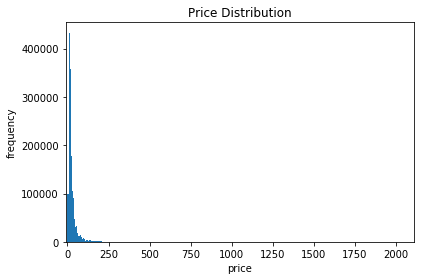

In [7]:
plt.hist(train_clean["price"], 300)
plt.title("Price Distribution")
ax = plt.gca()
ax.set_xlim(left = -10)
plt.ylabel("frequency")
plt.xlabel("price")
plt.tight_layout()
sns.set
plt.savefig('Images/Price_dist.png')
plt.show()

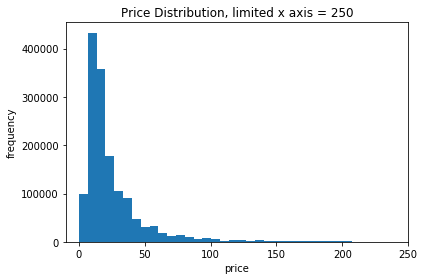

In [8]:
plt.hist(train_clean["price"], 300)
plt.title("Price Distribution, limited x axis = 250")
ax = plt.gca()
ax.set_xlim(-10,250)
plt.ylabel("frequency")
plt.xlabel("price")
plt.tight_layout()
sns.set
plt.savefig('Images/Price_dist_limit_x_250.png')
plt.show()

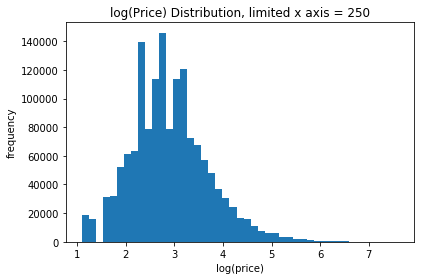

In [9]:
# remove zero's
prices = train_clean["price"].values
np.amin(prices[prices > 0])

# plot log histogram
plt.hist(np.log(prices[prices > 0]), 45)
plt.title("log(Price) Distribution, limited x axis = 250")
plt.ylabel("frequency")
plt.xlabel("log(price)")
plt.tight_layout()
sns.set
plt.savefig('Images/log_Price_dist_limit_x_250.png')
plt.show()

In [31]:
mean_values = train_clean.groupby('category_name_1')['price'].mean()
std_values = train_clean.groupby('category_name_1')['price'].std()
count_values = train_clean.groupby('category_name_1')['price'].count()

summary_category = pd.concat([mean_values, std_values, count_values], axis=1)
summary_category.columns = ['Mean Price', 'St Dev Price', "Listings Count"]

print(round(summary_category , 2))
train_clean.groupby('category_name_1')['price'].max()
train_clean.iloc[train_clean['price'].idxmax()]

                        Mean Price  St Dev Price  Listings Count
category_name_1                                                 
Beauty                       19.67         21.36          207828
Electronics                  35.17         65.42          122690
Handmade                     18.16         27.76           30842
Home                         24.54         24.42           67871
Kids                         20.64         22.73          171689
Men                          34.71         41.24           93680
Other                        20.81         29.85           45351
Sports & Outdoors            25.53         29.30           25342
Vintage & Collectibles       27.34         53.51           46530
Women                        28.89         39.44          664385


train_id                                                        760469
name                               NEW Chanel WOC Caviar Gold Hardware
item_condition_id                                                    1
category_name                      Women/Women's Handbags/Shoulder Bag
brand_name                                                      Chanel
price                                                             2009
shipping                                                             0
item_description     New with tag, box and dustbag but no receipt. ...
category_name_1                                                  Women
category_name_2                                       Women's Handbags
category_name_3                                           Shoulder Bag
Name: 760469, dtype: object

In [77]:
print("mean overall price" , train_clean["price"].mean())
print("overall st dev", train_clean["price"].std())

print("percent less than $50 price", len(train_clean.loc[train_clean['price'] < 50]) / len(train_clean))
print()

mean overall price 26.737516146330442
overall st dev 38.586066313339806
percent less than $50 price 0.8925131615779729



In [39]:
train_clean["desc_len"] = train_clean["item_description"].str.len()

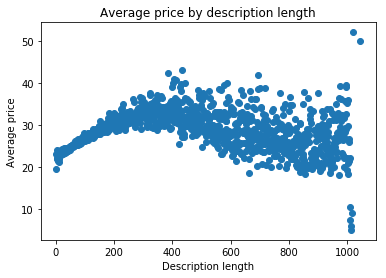

In [68]:
train_clean
series = train_clean.groupby('desc_len')['price'].mean()
desc_len = np.sort(train_clean.desc_len.unique())

series.values
desc_len[:-1]


plt.scatter(desc_len[:-1], series.values)
sns.set
plt.title("Average price by description length")
plt.xlabel("Description length")
plt.ylabel("Average price")
plt.savefig('Images/price_v_desc_len.png')
plt.show()

note: removed outliers


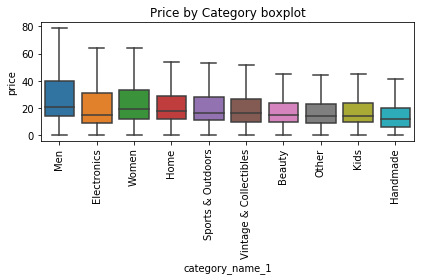

In [11]:

print("note: removed outliers")
plt.title("Price by Category boxplot")
plt.xticks(rotation=90)
sns.boxplot(x='category_name_1', y='price', data=train_clean, showfliers=False)
sns.set
plt.tight_layout()
plt.savefig('Images/Price_by_Cat.png')
plt.show()

In [12]:
# #word_coef_abs = dict(zip(Vocabulary, np.absolute(lreg.coef_[0])))

# wc = WordCloud(background_color="white")
# wc.generate_from_frequencies(frequencies = word_coef_abs)

In [13]:
# %%time

# samples = 10000
# state = 95

# # Sample Data to reduce the size
# sparse_matrix_sample = resample(sparse_matrix_tf_idf, 
#                                 n_samples=samples, random_state=state)

# # Fit PCA with top 2 components on a subset of the data
# pca = PCA(n_components=1000)

# descriptions_pca_fit = pca.fit(sparse_matrix_sample.todense())

In [14]:
# %%time
# descriptions_pca_transform = pca.transform(sparse_matrix_sample.todense())

In [15]:

# m = scipy.io.mmread("Data/descriptions_pca_transform.mtx")
# m

In [16]:
# descriptions_pca_transform

In [17]:
# plt.plot(pca.explained_variance_ratio_)
# plt.xlabel('Number of Components')
# plt.ylabel('Variance Explained')
# plt.title("Full Scree Plot")
# plt.show()



In [18]:
# plt.plot(pca.explained_variance_ratio_)
# plt.xlabel('Number of Components')
# plt.ylabel('Variance Explained')
# plt.title("Scree Plot (limited to 2 to 100 components)")
# plt.xlim(2, 100)
# plt.ylim(0, .01)
# plt.show()

In [19]:
%%time
from sklearn.preprocessing import Normalizer

samples = 200000
state = 95

# # Sample Data to reduce the size
sparse_matrix_sample = resample(sparse_matrix, 
                                 n_samples=samples, random_state=state)

normalizer = Normalizer()

sparse_matrix_sample_norm = normalizer.fit_transform(sparse_matrix_sample)

# fit PCA to the data that has 
pca_prunned = PCA()

descriptions_pca_fit_prunned = pca_prunned.fit(sparse_matrix_sample_norm.todense())

CPU times: user 7min 14s, sys: 37.1 s, total: 7min 51s
Wall time: 2min 26s


In [20]:
%%time
descriptions_pca_transform_prunned = pca_prunned.transform(sparse_matrix_sample_norm.todense())


CPU times: user 1min 46s, sys: 3.46 s, total: 1min 50s
Wall time: 20 s


In [21]:
print("pca prunned shape", descriptions_pca_transform_prunned.shape)

scipy.io.mmwrite("Data/normalized_prunned_PCA.mtx", descriptions_pca_transform_prunned)

pca prunned shape (200000, 2201)


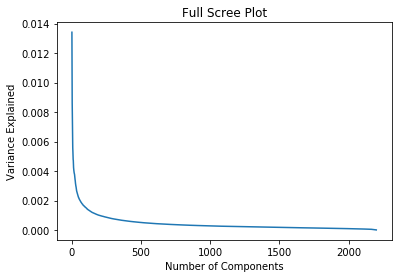

In [22]:
plt.plot(pca_prunned.explained_variance_ratio_)
plt.xlabel('Number of Components')
plt.ylabel('Variance Explained')
plt.title("Full Scree Plot")
sns.set
plt.savefig('Images/PCA_Prunned.png')
plt.show()


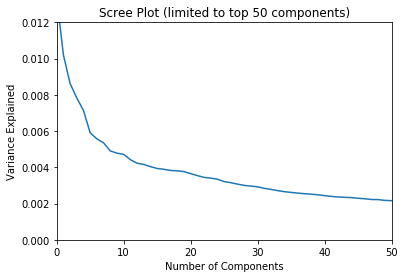

In [29]:
plt.plot(pca_prunned.explained_variance_ratio_)
plt.xlabel('Number of Components')
plt.ylabel('Variance Explained')
plt.title("Scree Plot (limited to top 50 components)")
plt.xlim(0, 50)
plt.ylim(0, .012)
plt.savefig('Images/PCA_Prunned_zoom.png')
plt.show()

In [81]:
pca_prunned.explained_variance_[0]

0.012389556866481945